# Interest Rates

# Interest Rate Data Retrieval and Processing

In this section, we will be concentrating on the acquisition, preprocessing, and exploratory analysis of interest rate data. The main **objectives** are to:

1. Gather historical interest rate data from the Federal Reserve Economic Data (FRED) database
2. Prepare and clean the interest rate data for further analysis
3. Address any inconsistencies or missing values in the dataset

**Data Sources**
Our primary source is the Federal Reserve Economic Data (FRED) database, which will provide us with various interest rates, including the Federal Funds Rate and Treasury rates, spanning from 1998 to 2023. We aim to analyze the short-term and long-term interest rate fluctuations and their potential impact on economic indicators or sectors of interest.

## 1. Imports

In [31]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from scipy.stats import norm
import statsmodels.api as sm

# Setting seaborn theme
sns.set_theme(
    context="talk",
    style="whitegrid",
    palette="colorblind",
    color_codes=True,
    rc={"figure.figsize": [12, 8]},
)

## 2. Acquiring and Cleaning Interest Rates Data

In this section, our focus lies on the preliminary steps of our analysis, which include sourcing and preparing the interest rates data for examination. Our process begins by acquiring historical interest rate information from FRED, ensuring that our dataset is both comprehensive and spans the necessary timeframe for our study. The cleaning process is critical as it involves standardizing data formats, handling missing values, and removing discrepancies to ensure accuracy and reliability. By laying this foundational work, we set the stage for a robust analysis, enabling us to investigate the relationship between interest rates and baseball payroll spending. Our ultimate goal is to create a clean and analyzed dataset, fully prepared for data exploration in the following sections, which is why we pay attention to every detail of the preparation process.

In [32]:
# Gathering Fed Funds rate from FRED
fed_funds_df = pdr.fred.FredReader(
    ["FEDFUNDS"], start="1998-01-01", end="2023-12-31"
).read()
fed_funds_df.columns = ["Fed Funds"]

In [33]:
# Gathering Treasury Securities from FRED
treasuries_df = pdr.fred.FredReader(
    [
        "DGS3MO",
        "DGS6MO",
        "DGS1",
        "DGS2",
        "DGS3",
        "DGS5",
        "DGS7",
        "DGS10",
        "DGS20",
        "DGS30",
    ],
    start="1998-01-01",
    end="2023-12-31",
).read()

# Renaming the columns for interpretability
columns = [
    "3MO T-Bill",
    "6MO T-Bill",
    "1YR T-Bill",
    "2YR T-Note",
    "3YR T-Note",
    "5YR T-Note",
    "7YR T-Note",
    "10YR T-Note",
    "20YR T-Bond",
    "30YR T-Bond",
]
treasuries_df.columns = columns

# Setting 'DATE' as the index after conversion to datetime if necessary
if "DATE" in treasuries_df.columns:
    treasuries_df["DATE"] = pd.to_datetime(treasuries_df["DATE"])
    treasuries_df.set_index("DATE", inplace=True)
elif treasuries_df.index.name == "DATE":
    treasuries_df.index = pd.to_datetime(treasuries_df.index)

# Sorting by index and resampling monthly
treasuries_df = treasuries_df.sort_index().resample("MS").first()

In [34]:
# Combining Treasury Securities and Fed Funds Data into a single DataFrame
interest_rates = pd.concat([fed_funds_df, treasuries_df], axis=1)

In [35]:
# Printing shapes of the DataFrames
print("Shape of Treasuries DataFrame:", treasuries_df.shape)
print("Shape of Fed Funds DataFrame:", fed_funds_df.shape)
print("Shape of Interest Rates DataFrame:", interest_rates.shape)

# Displaying the first few rows of the combined DataFrame
interest_rates.head()

Shape of Treasuries DataFrame: (312, 10)
Shape of Fed Funds DataFrame: (312, 1)
Shape of Interest Rates DataFrame: (312, 11)


,Fed Funds,3MO T-Bill,6MO T-Bill,1YR T-Bill,2YR T-Note,3YR T-Note,5YR T-Note,7YR T-Note,10YR T-Note,20YR T-Bond,30YR T-Bond
DATE,,,,,,,,,,,
1998-01-01,5.56,5.32,5.40,5.46,5.59,5.62,5.63,5.68,5.67,5.94,5.86
1998-02-01,5.51,5.26,5.30,5.26,5.36,5.38,5.43,5.55,5.57,5.93,5.87
1998-03-01,5.49,5.26,5.35,5.43,5.60,5.61,5.67,5.77,5.72,6.09,6.03
1998-04-01,5.45,5.12,5.24,5.37,5.55,5.58,5.59,5.68,5.62,5.98,5.90
1998-05-01,5.49,5.02,5.27,5.41,5.59,5.62,5.63,5.72,5.67,6.02,5.94


## 3. Exploratory Data Analysis: Visualizing Interest Rates Time Series

Understanding interest rate trends is essential for businesses to make informed financial decisions. By analyzing historical data, we can reveal patterns and their strategic implications. For businesses in the sports industry, like baseball teams, we hypothesize that interest rates can impact payroll management and financial sustainability. Our statistical analysis and visual representations provide insights into future economic environments.

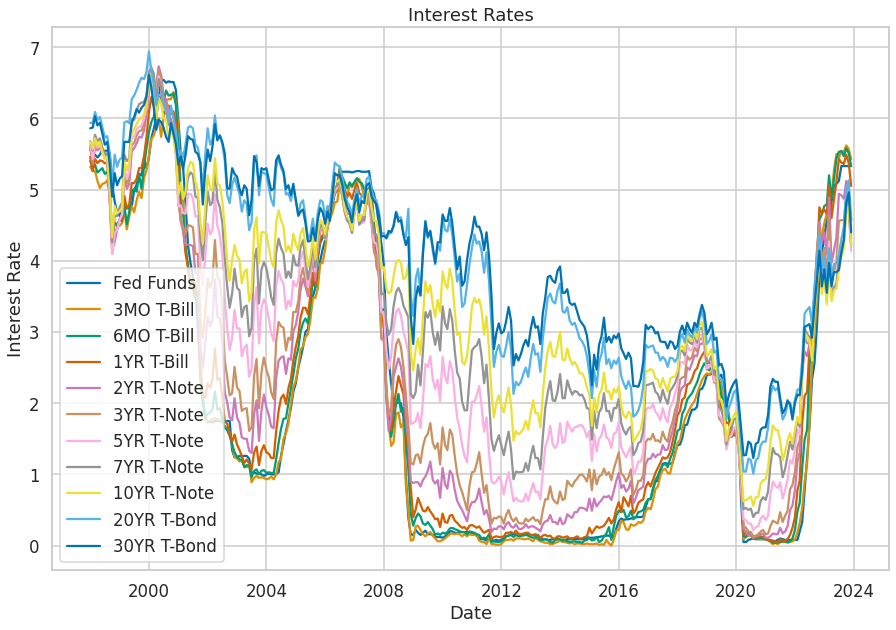

In [36]:
# Plotting the interest rates over time
plt.figure(figsize=(15, 10))
for rate in interest_rates.columns:
    if rate == "FEDFUNDS":
        plt.plot(
            interest_rates.index,
            interest_rates[rate],
            label=rate,
            linewidth=5.0,
            color="red",
        )
    else:
        plt.plot(interest_rates.index, interest_rates[rate], label=rate)

plt.title("Interest Rates")
plt.xlabel("Date")
plt.ylabel("Interest Rate")
plt.legend(loc="best")
plt.show()

We are dropping the treasury securities curves and will focus on the Effective Fed Funds interest rate since the Federal Reserve mainly focuses on this rate.

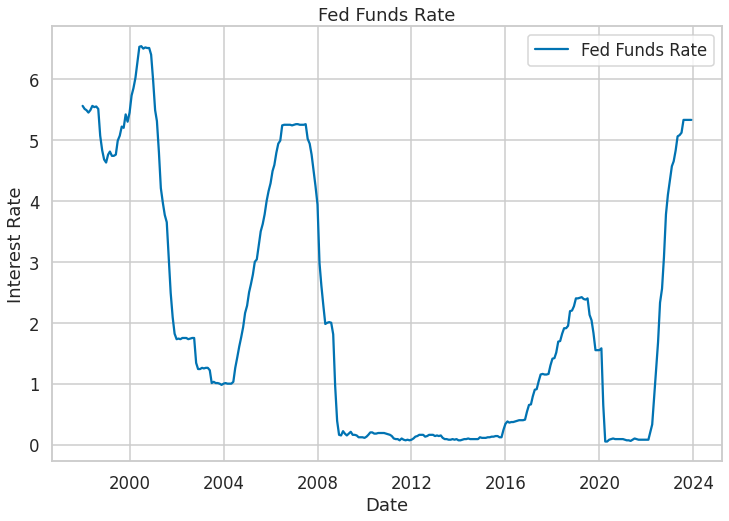

In [37]:
# Plot just the Fed Funds Rate
plt.figure(figsize=(12, 8))
plt.plot(interest_rates.index, interest_rates['Fed Funds'], label='Fed Funds Rate')
plt.title("Fed Funds Rate")
plt.xlabel("Date")
plt.ylabel("Interest Rate")
plt.legend()
plt.show()

We will visually analyze the fluctuations in interest rates over time to identify any major policy decisions that could have a significant impact on baseball teams. Our analysis will include both the percent change and log change in interest rates. However, we will prioritize the use of log change for our main analysis because it offers symmetrical calculations between periods. This characteristic of log change makes it particularly useful for comparing fluctuations in interest rates over time, ensuring a more consistent and intuitive understanding of growth rates and declines.

In [38]:
# Calculate percent change and log change for Fed Funds Rate
interest_rates["percent_change"] = interest_rates["Fed Funds"].pct_change()
interest_rates["log_change"] = np.log(interest_rates["Fed Funds"]) - np.log(
    interest_rates["Fed Funds"].shift(1)
)
interest_rates = interest_rates.dropna()

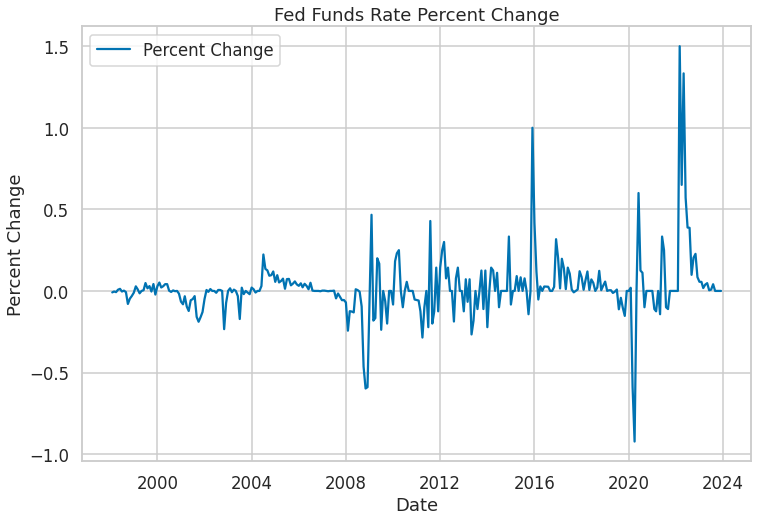

In [39]:
# Plot the percent change in the Fed Funds Rate
plt.figure(figsize=(12, 8))
plt.plot(interest_rates.index, interest_rates["percent_change"], label="Percent Change")
plt.title("Fed Funds Rate Percent Change")
plt.xlabel("Date")
plt.ylabel("Percent Change")
plt.legend()
plt.show()

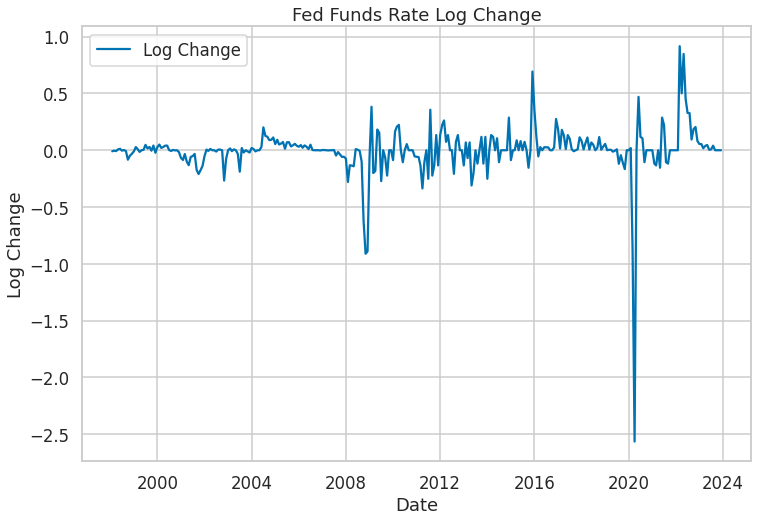

In [40]:
# Plot the log change in the Fed Funds Rate
plt.figure(figsize=(12, 8))
plt.plot(interest_rates.index, interest_rates["log_change"], label="Log Change")
plt.title("Fed Funds Rate Log Change")
plt.xlabel("Date")
plt.ylabel("Log Change")
plt.legend()
plt.show()

Lastly, this section provides a visual representation of changes in interest rates and their distribution, measured by log changes over time. Historically, these changes have remained within the 0 to 1 range, except for the COVID-19 pandemic. This indicates that the Federal Reserve has consistently managed its monetary policy effectively despite facing unprecedented challenges. While opinions may differ regarding the duration of the 0% interest rate era among economists, it has provided businesses with a stable monetary environment that allows for effective investment planning to meet consumer demand.

The impact of monetary policy on investment spending is particularly relevant for baseball teams. In stable economic environments, such as those seen outside periods of economic turbulence like the 2008 financial crisis and the COVID-19 pandemic, teams are likely to have adjusted their spending in anticipation of economic recovery and to take advantage of low borrowing costs. This analysis suggests that teams would have been incentivized to steadily increase their spending to improve competitiveness and address growing consumer demand during periods of near-zero interest rates.

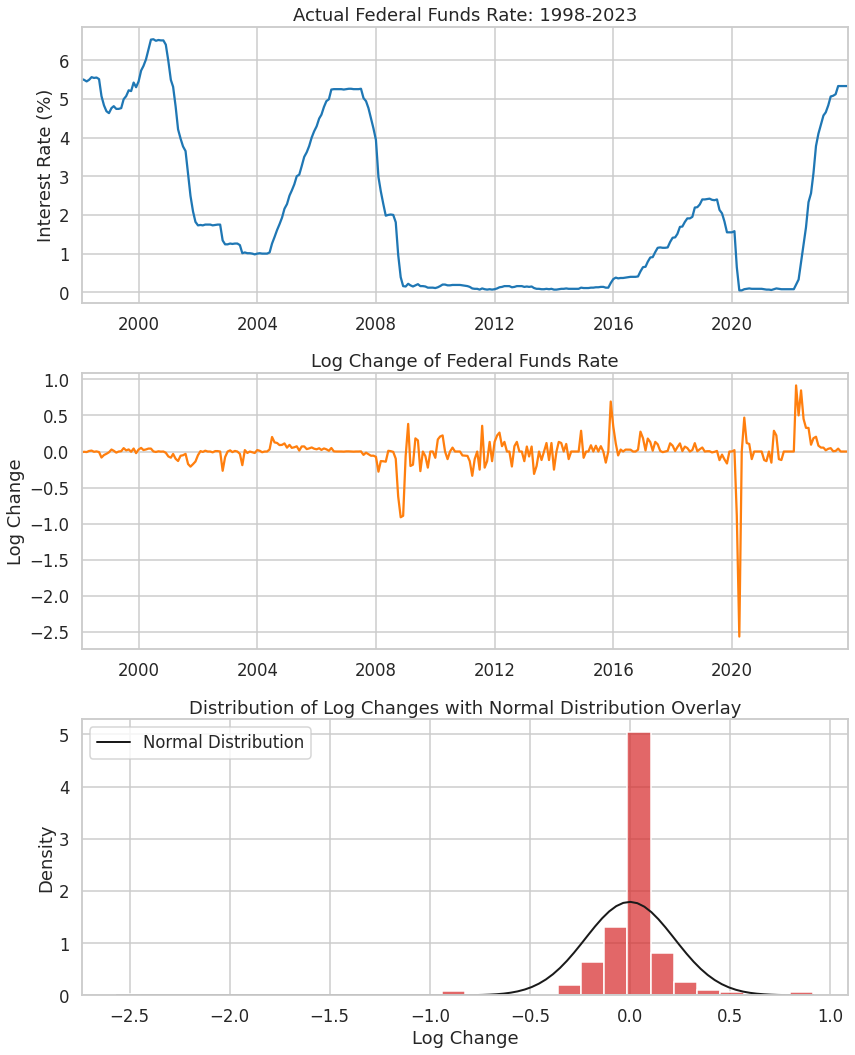

In [41]:
import matplotlib.dates as mdates

# Set the overall figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot 1: Actual Federal Interest Rate
axs[0].plot(
    interest_rates.index,
    interest_rates["Fed Funds"],
    label="Fed Funds Rate",
    color="tab:blue",
)
axs[0].xaxis.set_major_locator(mdates.YearLocator(base=4))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0].set_xlim(interest_rates.index[0], interest_rates.index[-1])
axs[0].set_title("Actual Federal Funds Rate: 1998-2023")
axs[0].set_ylabel("Interest Rate (%)")
axs[0].legend().set_visible(False)

# Plot 2: Log Change of the Interest Rate
axs[1].plot(
    interest_rates.index,
    interest_rates["log_change"],
    label="Log Change",
    color="tab:orange",
)
axs[1].xaxis.set_major_locator(mdates.YearLocator(base=4))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].set_xlim(interest_rates.index[0], interest_rates.index[-1])
axs[1].set_title("Log Change of Federal Funds Rate")
axs[1].set_ylabel("Log Change")
axs[1].legend().set_visible(False)

# Plot 3: Distribution of the Log Changes
# Calculating the normal distribution fit
mean_log_change = np.mean(interest_rates["log_change"])
std_log_change = np.std(interest_rates["log_change"])
xmin, xmax = interest_rates["log_change"].min(), interest_rates["log_change"].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_log_change, std_log_change)

# Plotting the histogram
sns.histplot(
    interest_rates["log_change"],
    bins=30,
    kde=False,
    ax=axs[2],
    color="tab:red",
    alpha=0.7,
    stat="density",
)
axs[2].plot(x, p, "k", linewidth=2, label="Normal Distribution")
axs[2].set_title("Distribution of Log Changes with Normal Distribution Overlay")
axs[2].set_xlabel("Log Change")
axs[2].set_ylabel("Density")
axs[2].legend()

# Adjust layout
plt.tight_layout()

plt.show()

## 4. Interest Rates and Baseball Payroll Spending: Exploratory Data Analysis

In this section, we will explore the relationship between interest rates and baseball payroll spending. Our aim is to use exploratory data analysis (EDA), statistical methods, and historical trends to shed light on how fluctuations in interest rates can impact the financial strategies of baseball teams. Our goal is to identify patterns and correlations through both visual and quantitative analyses, ultimately revealing the impact of monetary policy on sports management decisions. 

In [42]:
# Extracting September, June, and March Fed Funds Rates
# These interest rates will represent the lagged curves and will regress on baseball payroll
sept_fed_funds = interest_rates[interest_rates.index.month == 9]["Fed Funds"]
june_fed_funds = interest_rates[interest_rates.index.month == 6]["Fed Funds"]
march_fed_funds = interest_rates[interest_rates.index.month == 3]["Fed Funds"]

In [43]:
# Load baseball data from CSV into DataFrame
baseball_df = pd.read_csv("data/baseball.csv")

# Create new DataFrame with selected columns for payroll analysis
payroll_df = baseball_df[["YEAR", "Team Name", "ADJ_PAYROLL"]]

# Display the first few rows of the DataFrame
payroll_df.head()

,YEAR,Team Name,ADJ_PAYROLL
0,2023,Los Angeles Angels,204088094.0
1,2023,Arizona Diamondbacks,112763571.0
2,2023,Atlanta Braves,199727500.0
3,2023,Baltimore Orioles,64907966.0
4,2023,Boston Red Sox,175783182.0


The next two Jupyter cells visualize the spending curves by each team and the aggregated distribution over time. The boxplot helps us to identify spending patterns over time across the league, and we can see there is a general upward trend. Also, it's important to note that there are many outliers between 2010 and 2020, where interest rates were near zero.

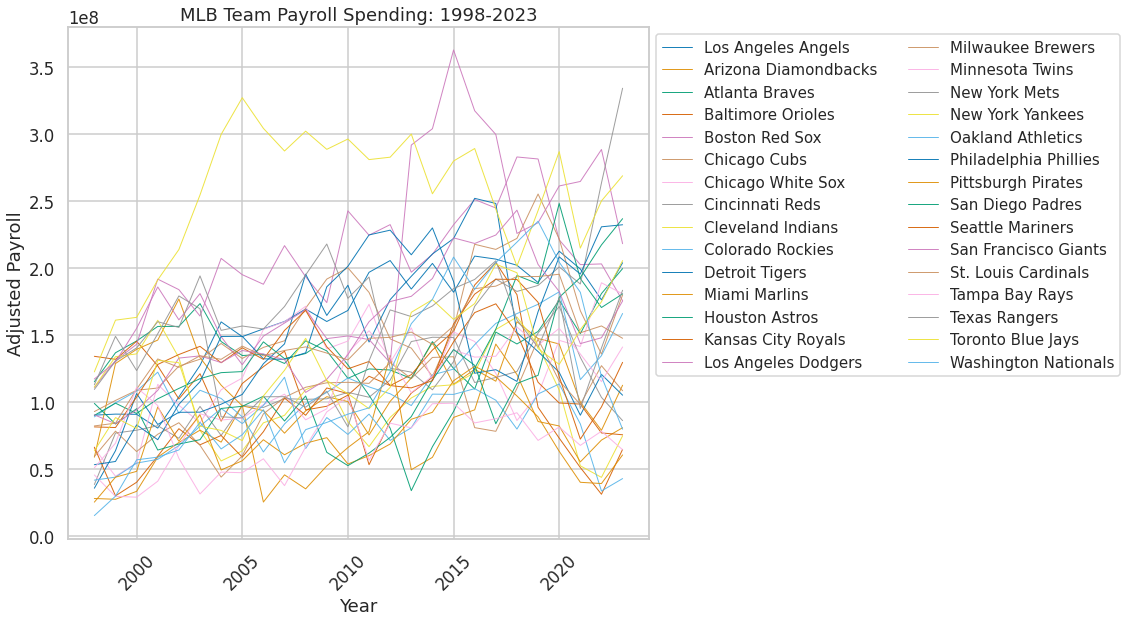

In [44]:
# Set the figure size for the plot
plt.figure(figsize=(16, 9))

# Loop through each team in the dataframe and plot their payroll
for team in payroll_df["Team Name"].unique():
    team_data = payroll_df[payroll_df["Team Name"] == team]
    plt.plot(
        team_data["YEAR"],
        team_data["ADJ_PAYROLL"],
        marker="",
        linewidth=1,
        alpha=0.9,
        label=team,
    )

# Adding supplemental items to help understand the visualization
plt.legend(ncol=2, loc="upper left", fontsize="small", bbox_to_anchor=(1, 1))
plt.title("MLB Team Payroll Spending: 1998-2023")
plt.xlabel("Year")
plt.ylabel("Adjusted Payroll")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

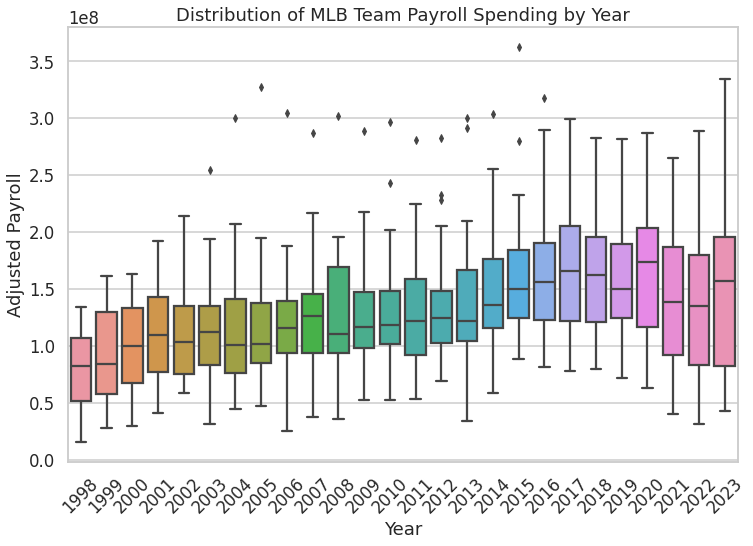

In [45]:
# Visualizae the boxplots of payroll spending by year
plt.figure(figsize=(12, 8))
sns.boxplot(x="YEAR", y="ADJ_PAYROLL", data=payroll_df)
plt.title("Distribution of MLB Team Payroll Spending by Year")
plt.xlabel("Year")
plt.ylabel("Adjusted Payroll")
plt.xticks(rotation=45)
plt.show()

The final two Jupyter cells are dedicated to visualizing the evolution of team spending over time. Utilizing heatmaps, we will offer a comparison of annual spending across different teams, initially presenting raw dollar values before proceeding to examine the data on a scaled basis. It's important to highlight an observable trend: during the early years of our study period, team spending was generally lower, correlating with higher interest rates. However, following the 2008 financial crisis, interest rates plummeted to near zero and remained low for an extended period. This era of reduced interest rates coincides with a noticeable increase in payroll expenditures by teams, even when accounting for inflation adjustments, indicating a real growth in spending over time.

The COVID-19 era introduced a sudden decrease in payroll spending, underscoring the pandemic's immediate financial impact on sports teams. The changes during this period present a unique case, meriting separate, in-depth analysis due to its distinct economic and social implications.

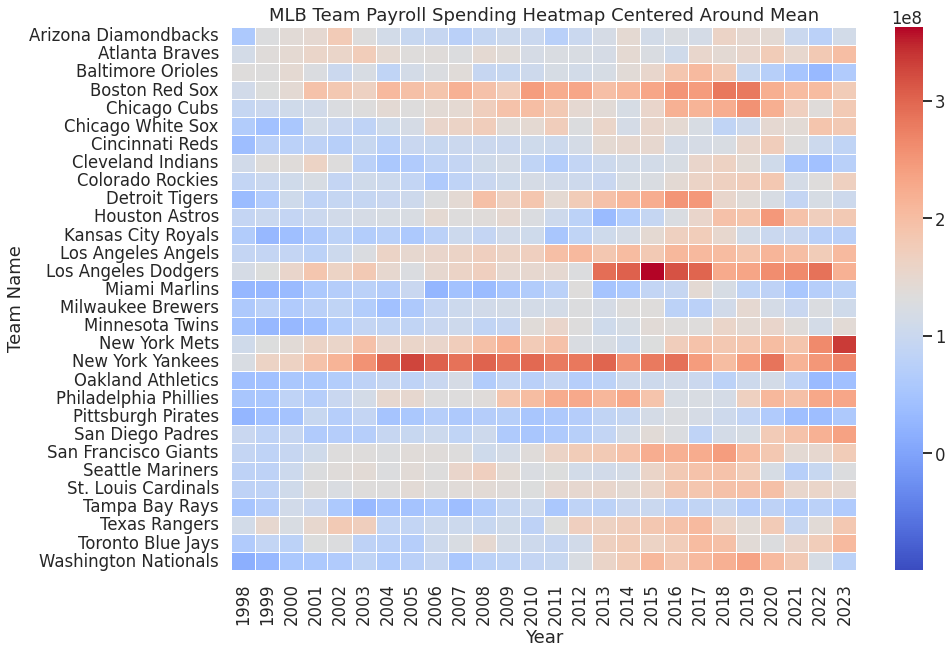

In [46]:
# Create pivot table
pivot_df = payroll_df.pivot_table(
    index="Team Name", columns="YEAR", values="ADJ_PAYROLL"
)

# Calculate the global mean of ADJ_PAYROLL
mean_value = payroll_df["ADJ_PAYROLL"].mean()

# Determine the maximum absolute deviation from the mean
max_deviation = max(
    pivot_df.max().max() - mean_value, mean_value - pivot_df.min().min()
)

plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_df,
    cmap="coolwarm",
    center=mean_value,
    vmin=mean_value - max_deviation,
    vmax=mean_value + max_deviation,
    linewidths=0.5,
)
plt.title("MLB Team Payroll Spending Heatmap Centered Around Mean")
plt.xlabel("Year")
plt.ylabel("Team Name")
plt.show()

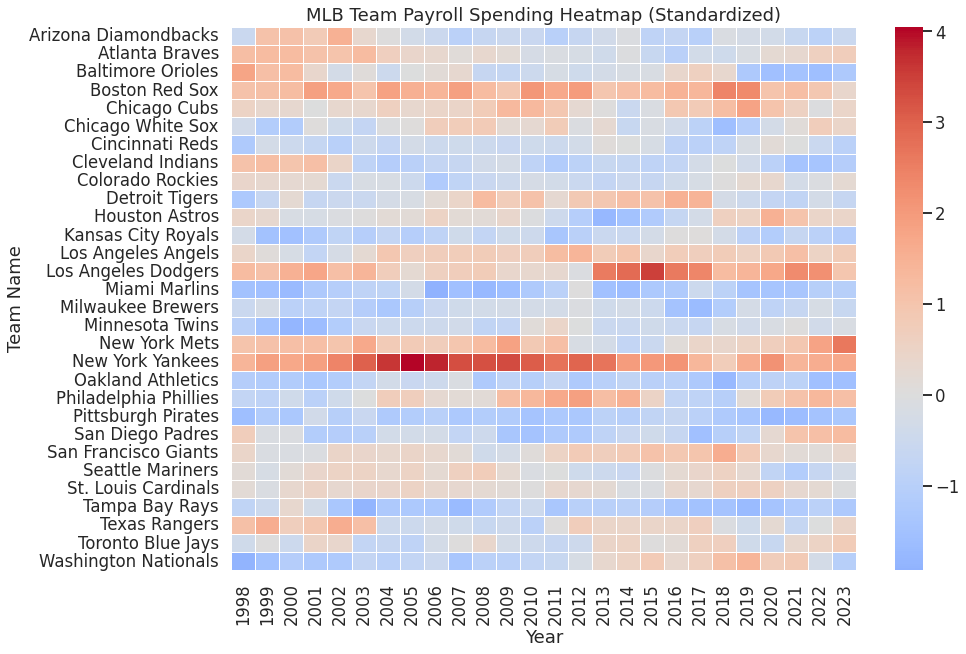

In [47]:
from sklearn.preprocessing import StandardScaler

# Create pivot table
pivot_df = payroll_df.pivot_table(
    index="Team Name",
    columns="YEAR",
    values="ADJ_PAYROLL",
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fill NA values with 0 and scale the data
payroll_scaled = scaler.fit_transform(pivot_df.fillna(0))

# Create a DataFrame from the scaled data
scaled_pivot_df = pd.DataFrame(
    payroll_scaled,
    index=pivot_df.index,
    columns=pivot_df.columns,
)

# Plotting the heatmap using the scaled data
plt.figure(figsize=(14, 10))
sns.heatmap(scaled_pivot_df, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("MLB Team Payroll Spending Heatmap (Standardized)")
plt.xlabel("Year")
plt.ylabel("Team Name")

# Save the plot as an image file
plt.savefig("heatmap.png")

plt.show()

## 5. Aggregating Payroll Expenditures to Visualize Curves and Regress on Interest Rates

Section 5 presents an analysis of payroll expenditures in professional baseball. Through the synthesis of payroll data across teams, we aim to uncover how financial strategies adapt to economic conditions. Our approach combines visualizations of spending trends with regression analysis to quantify the impact of interest rates on financial decision-making. By observing visual trends and substantiating them with statistical evidence, we provide a deeper insight into the strategic financial management of professional baseball.

In [48]:
grouped = payroll_df.groupby("YEAR").agg(
    Mean_ADJ_PAYROLL=("ADJ_PAYROLL", "mean"),
    Median_ADJ_PAYROLL=("ADJ_PAYROLL", "median"),
    Min_ADJ_PAYROLL=("ADJ_PAYROLL", "min"),
    Max_ADJ_PAYROLL=("ADJ_PAYROLL", "max"),
).reset_index()

grouped

,YEAR,Mean_ADJ_PAYROLL,Median_ADJ_PAYROLL,Min_ADJ_PAYROLL,Max_ADJ_PAYROLL
0,1998,7.679038e+07,8.205178e+07,1.554693e+07,1.343293e+08
1,1999,8.815702e+07,8.426365e+07,2.771206e+07,1.612983e+08
2,2000,9.797959e+07,9.960737e+07,2.927364e+07,1.633835e+08
3,2001,1.117648e+08,1.098120e+08,4.118651e+07,1.918853e+08
4,2002,1.139085e+08,1.032644e+08,5.824290e+07,2.139445e+08
5,2003,1.170064e+08,1.122020e+08,3.167998e+07,2.546567e+08
6,2004,1.120504e+08,1.007562e+08,4.424240e+07,2.997999e+08
7,2005,1.143286e+08,1.018958e+08,4.750986e+07,3.271852e+08
8,2006,1.195084e+08,1.156691e+08,2.564045e+07,3.043265e+08
9,2007,1.233443e+08,1.264551e+08,3.790188e+07,2.874531e+08


In [49]:
# Convert Series to DataFrame and reset index to access the year
sept_fed_funds_df = sept_fed_funds.reset_index()
sept_fed_funds_df['YEAR'] = sept_fed_funds_df['DATE'].dt.year
sept_fed_funds_df.rename(columns={'Fed Funds': 'Sept_Fed_Funds'}, inplace=True)

june_fed_funds_df = june_fed_funds.reset_index()
june_fed_funds_df['YEAR'] = june_fed_funds_df['DATE'].dt.year
june_fed_funds_df.rename(columns={'Fed Funds': 'June_Fed_Funds'}, inplace=True)

march_fed_funds_df = march_fed_funds.reset_index()
march_fed_funds_df['YEAR'] = march_fed_funds_df['DATE'].dt.year
march_fed_funds_df.rename(columns={'Fed Funds': 'March_Fed_Funds'}, inplace=True)

In [50]:
# Merge the Federal Funds DataFrames on YEAR
fed_funds_merged = sept_fed_funds_df.merge(
    june_fed_funds_df[["YEAR", "June_Fed_Funds"]],
    on="YEAR",
    how="outer",
)
fed_funds_merged = fed_funds_merged.merge(
    march_fed_funds_df[["YEAR", "March_Fed_Funds"]],
    on="YEAR",
    how="outer",
)

# Drop the 'index' column if not needed anymore
fed_funds_merged.drop(columns=["DATE"], inplace=True, errors="ignore")

In [51]:
# Merging payroll by year and calculate statistical measures
payroll_grouped = payroll_df.groupby("YEAR").agg(
    Mean_ADJ_PAYROLL=("ADJ_PAYROLL", "mean"),
    Median_ADJ_PAYROLL=("ADJ_PAYROLL", "median"),
    Min_ADJ_PAYROLL=("ADJ_PAYROLL", "min"),
    Max_ADJ_PAYROLL=("ADJ_PAYROLL", "max"),
).reset_index()

# Merge payroll data with Federal Funds Rates on 'YEAR'
payroll_merged_df = payroll_grouped.merge(fed_funds_merged, on='YEAR', how='outer')

# Rename columns for clarity
payroll_merged_df.rename(columns={
    "YEAR": "Year",
    "Mean_ADJ_PAYROLL": "Mean_Adjusted_Payroll",
    "Median_ADJ_PAYROLL": "Median_Adjusted_Payroll",
    "Min_ADJ_PAYROLL": "Min_Adjusted_Payroll",
    "Max_ADJ_PAYROLL": "Max_Adjusted_Payroll",
    "Sept_Fed_Funds": "September_Fed_Funds",
    "June_Fed_Funds": "June_Fed_Funds",
    "March_Fed_Funds": "March_Fed_Funds"
}, inplace=True)

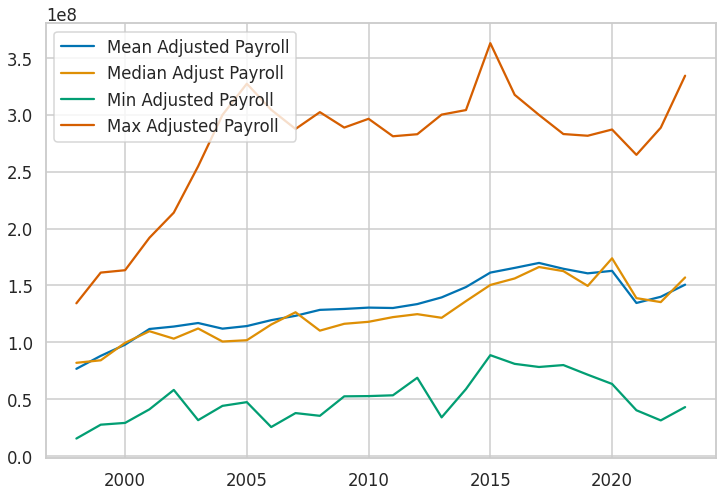

In [52]:
plt.figure(figsize=(12, 8))
plt.plot(
    payroll_merged_df.Year,
    payroll_merged_df.Mean_Adjusted_Payroll,
    label="Mean Adjusted Payroll",
)
plt.plot(
    payroll_merged_df.Year,
    payroll_merged_df.Median_Adjusted_Payroll,
    label="Median Adjust Payroll",
)
plt.plot(
    payroll_merged_df.Year,
    payroll_merged_df.Min_Adjusted_Payroll,
    label="Min Adjusted Payroll",
)
plt.plot(
    payroll_merged_df.Year,
    payroll_merged_df.Max_Adjusted_Payroll,
    label="Max Adjusted Payroll",
)
plt.legend()
plt.show()

We will calculate R-squared scores for each aggregated payroll expenditure curve to assess the impact of interest rates on spending. We aim to quantify the overall relationship between economic conditions and team payroll strategies by comparing these scores and taking their mean. This approach will highlight the consistency of this relationship across teams and provide a summarized metric for our analysis.

In [53]:
# Initialize a dictionry for R^2 scores
r2_scores = {
    "September_Fed_Funds": {},
    "June_Fed_Funds": {},
    "March_Fed_Funds": {}
}

# List of Federal Funds Rate months to include in the analysis
fed_funds_months = ["September_Fed_Funds", "June_Fed_Funds", "March_Fed_Funds"]

# List of payroll statistics to regress on
payroll_stats = ["Mean_Adjusted_Payroll", "Median_Adjusted_Payroll", "Min_Adjusted_Payroll", "Max_Adjusted_Payroll"]

for month in fed_funds_months:
    X = payroll_merged_df[[month]]  # Independent variable for the current month
    X = sm.add_constant(X)  # Adds a constant term to the predictor

    for stat in payroll_stats:
        y = payroll_merged_df[stat]  # Dependent variable for the current payroll statistic

        # Fit the OLS model
        model = sm.OLS(y, X).fit()

        # Extract the R^2 score and store it in the nested dictionary
        r2_scores[month][stat] = model.rsquared

# Display the r2_scores
r2_scores
# Calculate the mean of the R^2 scores for each month
mean_r2_scores = {
    month: np.mean(list(scores.values())) for month, scores in r2_scores.items()
}

# Display the mean R^2 scores
mean_r2_scores

{'September_Fed_Funds': 0.27575559491487667,
 'June_Fed_Funds': 0.28042801751702906,
 'March_Fed_Funds': 0.29497611369926835}

### Linear Regression Summaries

In [54]:
X = payroll_merged_df["September_Fed_Funds"]
X = sm.add_constant(X)
y = payroll_merged_df["Mean_Adjusted_Payroll"]

model = sm.OLS(y, X).fit()

model.summary()

OLS Regression Results 
 
 Dep. Variable: Mean_Adjusted_Payroll R-squared: 0.331 
 
 
 Model: OLS Adj. R-squared: 0.303 
 
 
 Method: Least Squares F-statistic: 11.87 
 
 
 Date: Fri, 16 Feb 2024 Prob (F-statistic): 0.00211 
 
 
 Time: 03:52:19 Log-Likelihood: -473.56 
 
 
 No. Observations: 26 AIC: 951.1 
 
 
 Df Residuals: 24 BIC: 953.6 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1.457e+08 5.7e+06 25.549 0.000 1.34e+08 1.57e+08 
 
 
 September_Fed_Funds -6.618e+06 1.92e+06 -3.445 0.002 -1.06e+07 -2.65e+06 
 
 
 
 
 Omnibus: 2.512 Durbin-Watson: 0.404 
 
 
 Prob(Omnibus): 0.285 Jarque-Bera (JB): 1.729 
 
 
 Skew: 0.427 Prob(JB): 0.421 
 
 
 Kurtosis: 2.068 Cond. No. 4.47 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [55]:
X = payroll_merged_df["June_Fed_Funds"]
X = sm.add_constant(X)
y = payroll_merged_df["Mean_Adjusted_Payroll"]

model = sm.OLS(y, X).fit()

model.summary()

OLS Regression Results 
 
 Dep. Variable: Mean_Adjusted_Payroll R-squared: 0.333 
 
 
 Model: OLS Adj. R-squared: 0.306 
 
 
 Method: Least Squares F-statistic: 12.00 
 
 
 Date: Fri, 16 Feb 2024 Prob (F-statistic): 0.00201 
 
 
 Time: 03:52:19 Log-Likelihood: -473.51 
 
 
 No. Observations: 26 AIC: 951.0 
 
 
 Df Residuals: 24 BIC: 953.5 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1.454e+08 5.62e+06 25.861 0.000 1.34e+08 1.57e+08 
 
 
 June_Fed_Funds -6.682e+06 1.93e+06 -3.465 0.002 -1.07e+07 -2.7e+06 
 
 
 
 
 Omnibus: 2.305 Durbin-Watson: 0.459 
 
 
 Prob(Omnibus): 0.316 Jarque-Bera (JB): 1.643 
 
 
 Skew: 0.417 Prob(JB): 0.440 
 
 
 Kurtosis: 2.094 Cond. No. 4.34 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [56]:
X = payroll_merged_df["March_Fed_Funds"]
X = sm.add_constant(X)
y = payroll_merged_df["Mean_Adjusted_Payroll"]

model = sm.OLS(y, X).fit()

model.summary()

OLS Regression Results 
 
 Dep. Variable: Mean_Adjusted_Payroll R-squared: 0.349 
 
 
 Model: OLS Adj. R-squared: 0.322 
 
 
 Method: Least Squares F-statistic: 12.87 
 
 
 Date: Fri, 16 Feb 2024 Prob (F-statistic): 0.00148 
 
 
 Time: 03:52:19 Log-Likelihood: -473.20 
 
 
 No. Observations: 26 AIC: 950.4 
 
 
 Df Residuals: 24 BIC: 952.9 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1.456e+08 5.53e+06 26.336 0.000 1.34e+08 1.57e+08 
 
 
 March_Fed_Funds -6.9e+06 1.92e+06 -3.588 0.001 -1.09e+07 -2.93e+06 
 
 
 
 
 Omnibus: 2.969 Durbin-Watson: 0.540 
 
 
 Prob(Omnibus): 0.227 Jarque-Bera (JB): 1.743 
 
 
 Skew: 0.377 Prob(JB): 0.418 
 
 
 Kurtosis: 1.979 Cond. No. 4.26 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

## 6. Comparative Analysis

In Section 6, we delve into a detailed comparative analysis that explores the relationship between interest rate and team spending patterns. Specifically, we examine how past interest rates impact current payroll decisions, keeping in mind the time lag between economic shifts and their effects. Our use of scaled data ensures a fair and unbiased comparison across aggregations and time periods, while incorporating lagged interest rates helps us account for the time-sensitive nature of financial responses. This section is critical in uncovering the complex dynamics that drive financial planning in professional baseball, offering valuable insights into how teams adjust their strategies in anticipation or response to economic changes.

In [57]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Columns representing payroll data to be scaled
payroll_columns = ["Mean_Adjusted_Payroll", "Median_Adjusted_Payroll", "Min_Adjusted_Payroll", "Max_Adjusted_Payroll"]

# Fit and transform the payroll data with the scaler
payroll_merged_df[payroll_columns] = scaler.fit_transform(payroll_merged_df[payroll_columns])

# Display the first few rows
payroll_merged_df.head()

,Year,Mean_Adjusted_Payroll,Median_Adjusted_Payroll,Min_Adjusted_Payroll,Max_Adjusted_Payroll,September_Fed_Funds,June_Fed_Funds,March_Fed_Funds
0,1998,-2.284077,-1.786130,-1.779481,-2.547709,5.51,5.56,5.49
1,1999,-1.811589,-1.696202,-1.146849,-2.054205,5.22,4.76,4.81
2,2000,-1.403284,-1.072369,-1.065641,-2.016049,6.52,6.53,5.85
3,2001,-0.830260,-0.657475,-0.446128,-1.494497,3.07,3.97,5.31
4,2002,-0.741150,-0.923685,0.440866,-1.090837,1.75,1.75,1.73


In [58]:
# Initialize a dictionry for R^2 scores
payroll_scaled_r2_scores = {
    "September_Fed_Funds": {},
    "June_Fed_Funds": {},
    "March_Fed_Funds": {}
}

# List of Federal Funds Rate months to include in the analysis
fed_funds_months = ["September_Fed_Funds", "June_Fed_Funds", "March_Fed_Funds"]

# List of payroll statistics to regress on
payroll_stats = ["Mean_Adjusted_Payroll", "Median_Adjusted_Payroll", "Min_Adjusted_Payroll", "Max_Adjusted_Payroll"]

for month in fed_funds_months:
    X = payroll_merged_df[[month]]  # Independent variable for the current month
    X = sm.add_constant(X)  # Adds a constant term to the predictor(s)

    for stat in payroll_stats:
        y = payroll_merged_df[stat]  # Dependent variable for the current payroll statistic

        # Fit the OLS model
        model = sm.OLS(y, X).fit()

        # Extract the R^2 score and store it in the nested dictionary
        payroll_scaled_r2_scores[month][stat] = model.rsquared

# Display the r2_scores and compare them
print(r2_scores)
print(payroll_scaled_r2_scores)

{'September_Fed_Funds': {'Mean_Adjusted_Payroll': 0.33090164182853243, 'Median_Adjusted_Payroll': 0.18161354798275353, 'Min_Adjusted_Payroll': 0.3501378638580752, 'Max_Adjusted_Payroll': 0.24036932599014538}, 'June_Fed_Funds': {'Mean_Adjusted_Payroll': 0.3333873685234443, 'Median_Adjusted_Payroll': 0.1810100063573611, 'Min_Adjusted_Payroll': 0.3239044573971841, 'Max_Adjusted_Payroll': 0.28341023779012686}, 'March_Fed_Funds': {'Mean_Adjusted_Payroll': 0.34910988687974875, 'Median_Adjusted_Payroll': 0.1942883212501899, 'Min_Adjusted_Payroll': 0.31288116591017745, 'Max_Adjusted_Payroll': 0.3236250807569574}}
{'September_Fed_Funds': {'Mean_Adjusted_Payroll': 0.33090164182853243, 'Median_Adjusted_Payroll': 0.18161354798275364, 'Min_Adjusted_Payroll': 0.350137863858075, 'Max_Adjusted_Payroll': 0.2403693259901457}, 'June_Fed_Funds': {'Mean_Adjusted_Payroll': 0.33338736852344375, 'Median_Adjusted_Payroll': 0.1810100063573613, 'Min_Adjusted_Payroll': 0.3239044573971843, 'Max_Adjusted_Payroll': 

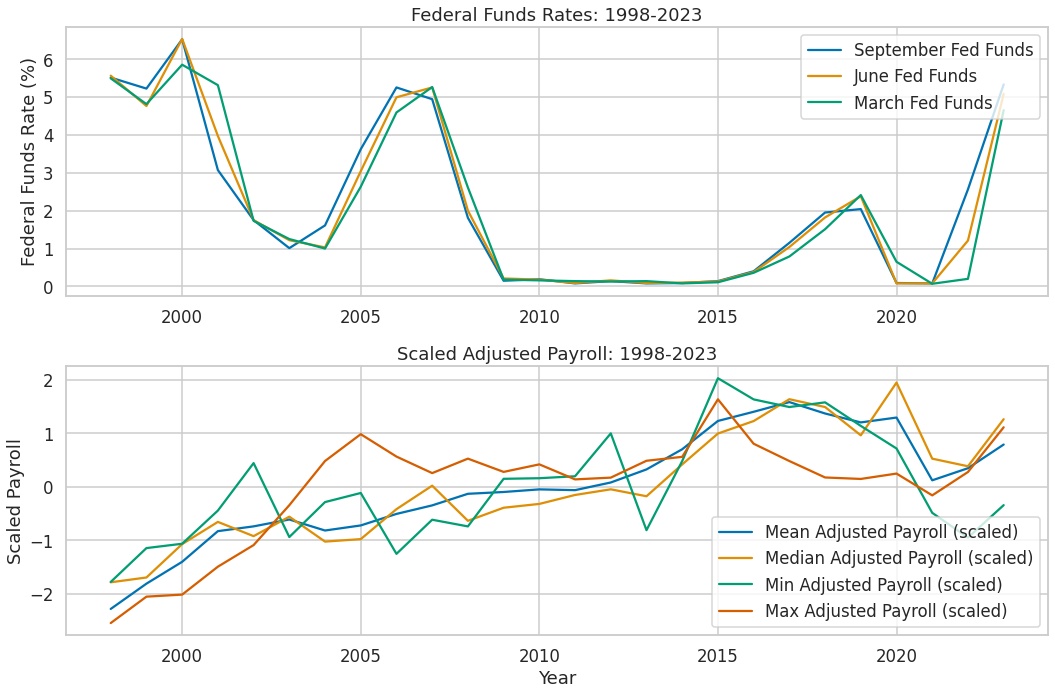

In [59]:
# Set up figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot Federal Funds Rates
axs[0].plot(
    payroll_merged_df.Year,
    payroll_merged_df.September_Fed_Funds,
    label="September Fed Funds",
)
axs[0].plot(
    payroll_merged_df.Year, payroll_merged_df.June_Fed_Funds, label="June Fed Funds"
)
axs[0].plot(
    payroll_merged_df.Year, payroll_merged_df.March_Fed_Funds, label="March Fed Funds"
)
axs[0].set_ylabel("Federal Funds Rate (%)")
axs[0].set_title("Federal Funds Rates: 1998-2023")
axs[0].legend(loc="upper right")

# Plot Scaled Payroll Data
axs[1].plot(
    payroll_merged_df.Year,
    payroll_merged_df.Mean_Adjusted_Payroll,
    label="Mean Adjusted Payroll (scaled)",
)
axs[1].plot(
    payroll_merged_df.Year,
    payroll_merged_df.Median_Adjusted_Payroll,
    label="Median Adjusted Payroll (scaled)",
)
axs[1].plot(
    payroll_merged_df.Year,
    payroll_merged_df.Min_Adjusted_Payroll,
    label="Min Adjusted Payroll (scaled)",
)
axs[1].plot(
    payroll_merged_df.Year,
    payroll_merged_df.Max_Adjusted_Payroll,
    label="Max Adjusted Payroll (scaled)",
)
axs[1].set_ylabel("Scaled Payroll")
axs[1].set_xlabel("Year")
axs[1].set_title("Scaled Adjusted Payroll: 1998-2023")
axs[1].legend()

plt.tight_layout()
plt.show()

Our analysis indicates that there is a noticeable consistency in the movements of lagged interest rate curves, indicating a relatively stable monetary policy within a given year. This stability becomes particularly evident when interest rates decline to near-zero levels, where a corresponding increase in spending is observed. However, with a mean R-squared value of approximately 0.28, our model only accounts for a modest portion of the variation in spending patterns. This suggests that while there may be an association, a direct causal relationship cannot be conclusively established based on this data alone. This underscores the complexity of the factors involved and highlights the need for further investigation. Future research should aim to explore additional variables and more nuanced models to better understand the dynamics between interest rates and spending, potentially uncovering causal links that could inform more effective financial strategies.

In [60]:
%load_ext watermark
%watermark -d -t -v -p pandas,numpy,matplotlib,scikit-learn,seaborn,pandas_datareader,scipy,statsmodels

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.31.1

pandas           : 1.5.3
numpy            : 1.24.3
matplotlib       : 3.7.1
scikit-learn     : 1.2.2
seaborn          : 0.12.2
pandas_datareader: 0.10.0
scipy            : 1.9.1
statsmodels      : 0.14.0

